In [31]:
# read the data
import pandas as pd
df = pd.read_csv('creditcard.csv')

In [32]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,79084.10,0


In [33]:
df.shape

(10000, 13)

In [34]:
# check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [35]:
# drop unneeded columns for predicting
df=df.drop(['Surname','CustomerId', 'RowNumber'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,79084.10,0


In [36]:
# create dummy variables
df2=pd.get_dummies(df)

In [37]:
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,79084.10,0,0,0,1,1,0


In [38]:
# prepare the data for scaling, make sure to not include binaries
temp = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']]

In [39]:
# scale the continuous data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_array = scaler.fit_transform(temp) 

In [40]:
# the output is a numpy array so convert back to dataframe, and check if mean is 0 and std 1
scaled_df = pd.DataFrame(scaled_array, columns=['CreditScore', 'Age','Tenure', 'Balance', 'NumOfProducts','EstimatedSalary'])
scaled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,-4.870326e-16,1.00005,-3.109504,-0.688359,0.015222,0.698109,2.063884
Age,10000.0,2.484679e-16,1.00005,-1.994969,-0.660018,-0.183251,0.484225,5.061197
Tenure,10000.0,-1.400324e-16,1.00005,-1.733315,-0.695982,-0.004426,0.687130,1.724464
Balance,10000.0,-5.978551e-17,1.00005,-1.225848,-1.225848,0.331964,0.819920,2.795323
NumOfProducts,10000.0,-8.652634e-16,1.00005,-0.911583,-0.911583,-0.911583,0.807737,4.246377
EstimatedSalary,10000.0,-1.580958e-17,1.00005,-1.740268,-0.853594,0.001803,0.857243,1.737200


In [41]:
# insert binaries back into scaled_df
scaled_df[['IsActiveMember','Geography_France','Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male', 'Exited']] = df2[['IsActiveMember','Geography_France',
          'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male', 'Exited']]

In [42]:
scaled_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886,1,1,0,0,1,0,1
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534,1,0,0,1,1,0,0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687,0,1,0,0,1,0,1
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918,0,1,0,0,1,0,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276,1,0,0,1,1,0,0


In [43]:
scaled_df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'IsActiveMember', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male',
       'Exited'],
      dtype='object')

In [44]:
# set X and Y
X = scaled_df[['CreditScore', 'Age', 'Tenure', 'Balance', 
               'NumOfProducts','EstimatedSalary','IsActiveMember','Geography_France',
               'Geography_Germany','Geography_Spain', 'Gender_Female', 'Gender_Male']].copy()
Y = scaled_df['Exited'].copy()

In [45]:
# split the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [46]:
X_train.shape

(7000, 12)

In [47]:
X_test.shape

(3000, 12)

In [48]:
# import keras libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

In [49]:
# declare model architecture

model = Sequential()

# input and first hidden layer
model.add(Dense(8, activation='relu', input_dim=X_train.shape[1], name='first_hidden')) 
model.add(Dropout(0.2)) # distribute the "knowledge" across the network
model.add(BatchNormalization()) # Re-centers the results to ensure they dont drift

# second hidden layer
model.add(Dense(8, activation = 'relu', name='second_hidden'))
model.add(Dropout(0.2))
model.add(BatchNormalization())  

# use sigmoid in the output layer since outputting a probability, only one node needed
model.add(Dense(1, activation='sigmoid', name='output'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_hidden (Dense)        (None, 8)                 104       
                                                                 
 dropout_4 (Dropout)         (None, 8)                 0         
                                                                 
 batch_normalization_4 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 second_hidden (Dense)       (None, 8)                 72        
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 batch_normalization_5 (Batc  (None, 8)                32        
 hNormalization)                                      

In [50]:
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
# train the model
history = model.fit(X_train, Y_train, batch_size = 10, validation_data=(X_test,Y_test), epochs = 150, verbose=0)

In [52]:
# examine the model accuracy for the training data
loss,accuracy= model.evaluate(X_train,Y_train)
print("The model loss is {:.2f}, its accuracy is {:.2f}. ".format(loss,accuracy))

219/219 [==============================] - 0s 1ms/step - loss: 0.3593 - accuracy: 0.8589
The model loss is 0.36, its accuracy is 0.86. 


In [53]:
# create confusion matrix
from sklearn.metrics import confusion_matrix
predictions_train = (model.predict(X_train) > 0.5).astype("int32")
confusion_matrix(Y_train,predictions_train)

219/219 [==============================] - 0s 956us/step


array([[5429,  155],
       [ 833,  583]], dtype=int64)

In [54]:
# examine the model accuracy for the test data
loss, accuracy = model.evaluate(X_test,Y_test)
print("The model loss is {:.2f}, its accuracy is {:.2f}. ".format(loss,accuracy))

94/94 [==============================] - 0s 1ms/step - loss: 0.3646 - accuracy: 0.8610
The model loss is 0.36, its accuracy is 0.86. 


In [55]:
# confusion matrix for the test data
predictions_test = (model.predict(X_test) > 0.5).astype("int32")
confusion_matrix(Y_test,predictions_test)

94/94 [==============================] - 0s 1ms/step


array([[2298,   81],
       [ 336,  285]], dtype=int64)

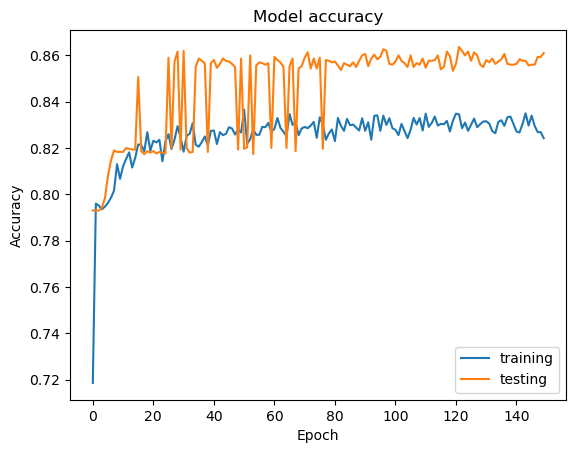

In [56]:
# visualize the accuracy and loss for train and test sets
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='testing')
plt.title('Model accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

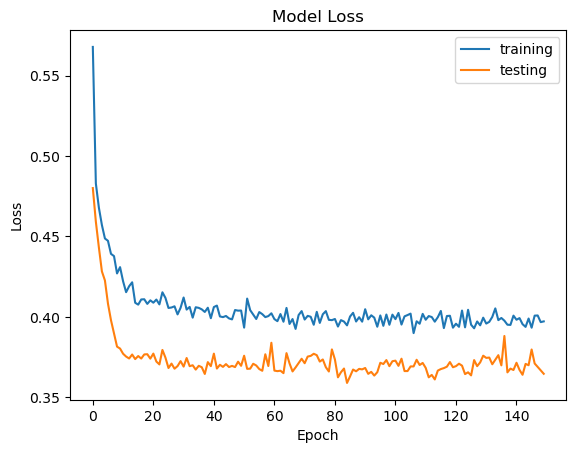

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='testing')
plt.title('Model Loss')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
# this code can be used to tune the network based on number of 'epochs' and 'batch_size'
# depending on the final cross validation score, select the values of epochs and batch_size

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier

# define a function that creates a neural network model
def create_model(epochs=150, batch_size=10):
    model = Sequential()
    model.add(Dense(8, activation='relu', input_dim=X_train.shape[1], name='first_hidden')) 
    model.add(Dropout(0.2))
    model.add(BatchNormalization()) 
    model.add(Dense(8, activation = 'relu', name='second_hidden'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())  
    model.add(Dense(1, activation='sigmoid', name='output'))
    model_kf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model_kf


# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

epochs=[50,100,150]
batch_sizes=[5,10,20]

best_mean_accuracy = 0
best_params = {'epochs': None, 'batch_size': None}


for epoch in epochs:
    for batch_size in batch_sizes:
        model_kf = KerasClassifier(build_fn=create_model, epochs=epoch, batch_size=batch_size, verbose=0)
        CVscores = cross_val_score(model_kf, X_train, Y_train, scoring='accuracy', cv=kf)
        print('With epochs={} and with batch_size={}, the Cross validation accuracy mean is {}:'.format(epoch,batch_size,CVscores.mean()))
        
        #Check if the current combination has a higher mean accuracy

        if CVscores.mean() > best_mean_accuracy:
            best_mean_accuracy = CVscores.mean()
            best_params['epochs'] = epoch
            best_params['batch_size'] = batch_size

print(f"\nBest parameters: {best_params}")
print(f"Best mean score: {best_mean_accuracy}")